In [ ]:
'''
Academic Integrity Statement

"I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work."

'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from keras import regularizers

In [ ]:
#Part I: Data Analysis – income_dataset
#Step-1:
data = pd.read_csv("income.csv")
data_income = pd.DataFrame(data)

In [ ]:
data_income.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [ ]:
#the empty list signifies that there is no null values in the datset
missing = [var for var in data_income.columns if data_income[var].isnull().mean() >0 ]
missing

[]

In [ ]:
# cleaning special character from data
features = ['age','workclass', 'fnlwgt','education','education.num','marital.status','occupation', 'relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']
for feature in features:
    data_income[feature].fillna(data_income[feature].mode()[0],inplace=True) #cleaning NaNs
    data_income.drop(data_income.index[data_income[feature] == '?'], inplace=True)
    data.drop(data.index[data['sex'] == '.'], inplace=True)

In [ ]:
data_income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


In [ ]:
data_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [ ]:
for col_name in data_income.columns:
    if data_income[col_name].dtypes == 'object':
        data_income[col_name] = data_income[col_name].astype('category') #Converting string datatypes into categorical
        unique_count = len(data_income[col_name].unique()) #find unique values in categorical values
        print("Feature '{col_name}' has {unique_count} unique categories".format(col_name=col_name, unique_count=unique_count))

Feature 'workclass' has 7 unique categories
Feature 'education' has 16 unique categories
Feature 'marital.status' has 7 unique categories
Feature 'occupation' has 14 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native.country' has 41 unique categories
Feature 'income' has 2 unique categories


In [ ]:
# Check the updated datatypes
data_income.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
income            category
dtype: object

In [ ]:
#renaming column name and printing the frequency of each unique value in the column
data_income.rename(columns = {'native.country':'native_country'}, inplace = True)
print(data_income['native_country'].value_counts().sort_values(ascending=False).head(10))

United-States    27504
Mexico             610
Philippines        188
Germany            128
Puerto-Rico        109
Canada             107
El-Salvador        100
India              100
Cuba                92
England             86
Name: native_country, dtype: int64


In [ ]:
#majority is from United States, assuming the total sum of the remaining unique occurence to 'other'.
data_income['native_country'] = ['United-States' if x == 'United-States' else 'Other' for x in data_income['native_country']]
print(data_income['native_country'].value_counts().sort_values(ascending=False))

United-States    27504
Other             2658
Name: native_country, dtype: int64


In [ ]:
#printing unique data in 'workclass'
data_income.workclass.unique()

['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay']
Categories (7, object): ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [ ]:
#printing unique data in 'education'
data_income.education.unique()

['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate', ..., '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']

In [ ]:
#printing unique data in 'marital_status'
data_income.rename(columns = {'marital.status':'marital_status'}, inplace = True)
data_income.marital_status.unique()

['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
Categories (7, object): ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

In [ ]:
#printing unique data in 'occupation'
data_income.occupation.unique()

['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty', 'Other-service', 'Adm-clerical', ..., 'Tech-support', 'Protective-serv', 'Handlers-cleaners', 'Armed-Forces', 'Priv-house-serv']
Length: 14
Categories (14, object): ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', ..., 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

In [ ]:
#printing unique data in 'relationship'
data_income.relationship.unique()

['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative', 'Husband', 'Wife']
Categories (6, object): ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

In [ ]:
#printing unique data in 'race'
data_income.race.unique()

['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']
Categories (5, object): ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [ ]:
#printing unique data in 'sex'
data_income.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [ ]:
#printing unique data in 'income'
data_income.income.unique()

['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']

In [ ]:
#printing unique data in 'native_country'
data_income.native_country.unique()

array(['United-States', 'Other'], dtype=object)

In [ ]:
#encoding numerical values to all the categorical variables
new_data = data_income.copy()
new_data['sex'].replace(['Female', 'Male'],[1,0], inplace=True)
new_data['native_country'].replace(['United-States', 'Other'],[1,0], inplace=True)
new_data['workclass'].replace(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc','State-gov', 'Without-pay'],
                                  [7, 6, 5, 4, 3, 2, 1], inplace=True)
new_data['marital_status'].replace(['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
                                   [7,6,5,4,3,2,1], inplace=True)
new_data['race'].replace(['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'],
                         [5,4,3,2,1], inplace=True)
new_data['income'].replace(['<=50K', '>50K'],[0,1], inplace=True)
new_data['relationship'].replace(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative', 'Husband', 'Wife'],
                                 [6,5,4,3,2,1], inplace=True)
new_data['education'].replace(['HS-grad', '7th-8th', 'Some-college', '10th', 
                               'Doctorate','5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool','Bachelors','Masters','Assoc-voc','1st-4th','11th','Prof-school'],
                              [16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], inplace=True)
new_data['occupation'].replace(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty', 'Other-service', 
                                'Adm-clerical','Tech-support', 'Protective-serv', 'Handlers-cleaners', 
                                'Armed-Forces', 'Priv-house-serv','Sales','Craft-repair','Farming-fishing','Transport-moving'],
                               [14,13,12,11,10,9,8,7,6,5,4,3,2,1], inplace=True)



In [ ]:
#rescaling the range of numerical values to 0 to 1
num_cols = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
new_data[num_cols] = ((new_data[num_cols] - new_data[num_cols].min())/
                        (new_data[num_cols].max() - new_data[num_cols].min()))

In [ ]:
new_data.head(10)

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native_country,income
1,0.890411,5,0.080970,16,0.533333,7,14,6,5,1,0.0,1.000000,0.173469,1,0
3,0.506849,5,0.086061,15,0.200000,6,13,5,5,1,0.0,0.895317,0.397959,1,0
4,0.328767,5,0.170568,14,0.600000,5,12,4,5,1,0.0,0.895317,0.397959,1,0
5,0.232877,5,0.138072,16,0.533333,6,11,5,5,1,0.0,0.865473,0.448980,1,0
6,0.287671,5,0.093024,13,0.333333,5,10,5,5,0,0.0,0.865473,0.397959,1,0
7,0.780822,2,0.050899,12,1.000000,4,12,3,5,1,0.0,0.845500,0.193878,1,1
8,0.698630,7,0.277540,16,0.533333,6,12,6,5,1,0.0,0.845500,0.397959,1,0
10,0.383562,5,0.107758,12,1.000000,6,12,5,4,1,0.0,0.689624,0.346939,1,1
11,0.287671,3,0.102491,1,0.933333,4,12,6,5,0,0.0,0.648301,0.448980,1,1
12,0.479452,5,0.078459,6,0.800000,7,11,6,5,1,0.0,0.648301,0.193878,1,1


In [ ]:
X = new_data.drop(columns = 'income',axis =1)
y = new_data['income']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_train= np.asarray(X_train).astype('float32')
y_train= np.asarray(y_train).astype('float32')

In [ ]:
model1 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation = 'relu'),
     tf.keras.layers.Dropout(0.1),
     tf.keras.layers.Dense(32,activation = 'sigmoid'),
     tf.keras.layers.Dropout(0.1),
     tf.keras.layers.Dense(8,activation = 'softmax'),
     tf.keras.layers.Dropout(0.1)
    ])

In [ ]:
model2 = tf.keras.models.Sequential(
    [
    
     tf.keras.layers.Dense(128,activation = 'relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(32,activation = 'sigmoid'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(8,activation = 'softmax'),
     tf.keras.layers.Dropout(0.2)
    ])

In [ ]:
model3 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(180,activation = 'relu'),
     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(40,activation = 'sigmoid'),
     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(8,activation = 'softmax'),
     tf.keras.layers.Dropout(0.3)
    ])

Epoch 1/50
899/899 - 12s - loss: 1.3714 - accuracy: 0.7451 - val_loss: 0.4663 - val_accuracy: 0.8241 - 12s/epoch - 14ms/step
Epoch 2/50
899/899 - 3s - loss: 1.3245 - accuracy: 0.7507 - val_loss: 0.5252 - val_accuracy: 0.8357 - 3s/epoch - 4ms/step
Epoch 3/50
899/899 - 3s - loss: 1.3147 - accuracy: 0.7512 - val_loss: 0.4819 - val_accuracy: 0.8360 - 3s/epoch - 4ms/step
Epoch 4/50
899/899 - 3s - loss: 1.2952 - accuracy: 0.7534 - val_loss: 0.5532 - val_accuracy: 0.8268 - 3s/epoch - 4ms/step
Epoch 5/50
899/899 - 3s - loss: 1.2923 - accuracy: 0.7552 - val_loss: 0.5787 - val_accuracy: 0.8402 - 3s/epoch - 4ms/step
Epoch 6/50
899/899 - 3s - loss: 1.3104 - accuracy: 0.7565 - val_loss: 0.5472 - val_accuracy: 0.8305 - 3s/epoch - 3ms/step
Epoch 7/50
899/899 - 3s - loss: 1.3121 - accuracy: 0.7552 - val_loss: 0.5624 - val_accuracy: 0.8355 - 3s/epoch - 4ms/step
Epoch 8/50
899/899 - 3s - loss: 1.2733 - accuracy: 0.7606 - val_loss: 0.4915 - val_accuracy: 0.8365 - 3s/epoch - 3ms/step
Epoch 9/50
899/899 - 

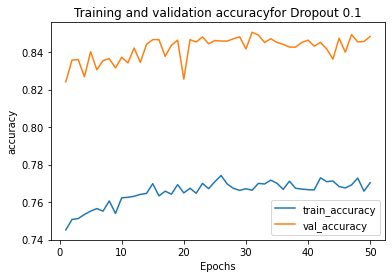

In [ ]:
model1.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
my_model1 = model1.fit(X_train,y_train,epochs = 50, batch_size=18, validation_split=0.2, verbose=2)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric + 'for Dropout 0.1')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(my_model1, 'accuracy')

Epoch 1/50
899/899 - 4s - loss: 1.1482 - accuracy: 0.7747 - val_loss: 0.4355 - val_accuracy: 0.8429 - 4s/epoch - 4ms/step
Epoch 2/50
899/899 - 3s - loss: 1.2034 - accuracy: 0.7720 - val_loss: 0.4510 - val_accuracy: 0.8496 - 3s/epoch - 4ms/step
Epoch 3/50
899/899 - 3s - loss: 1.1662 - accuracy: 0.7716 - val_loss: 0.4591 - val_accuracy: 0.8478 - 3s/epoch - 3ms/step
Epoch 4/50
899/899 - 3s - loss: 1.1289 - accuracy: 0.7754 - val_loss: 0.5503 - val_accuracy: 0.8375 - 3s/epoch - 4ms/step
Epoch 5/50
899/899 - 3s - loss: 1.2089 - accuracy: 0.7694 - val_loss: 0.4681 - val_accuracy: 0.8461 - 3s/epoch - 4ms/step
Epoch 6/50
899/899 - 3s - loss: 1.1603 - accuracy: 0.7727 - val_loss: 0.4584 - val_accuracy: 0.8466 - 3s/epoch - 4ms/step
Epoch 7/50
899/899 - 3s - loss: 1.1999 - accuracy: 0.7721 - val_loss: 0.4289 - val_accuracy: 0.8483 - 3s/epoch - 4ms/step
Epoch 8/50
899/899 - 3s - loss: 1.2103 - accuracy: 0.7715 - val_loss: 0.4847 - val_accuracy: 0.8493 - 3s/epoch - 4ms/step
Epoch 9/50
899/899 - 3s 

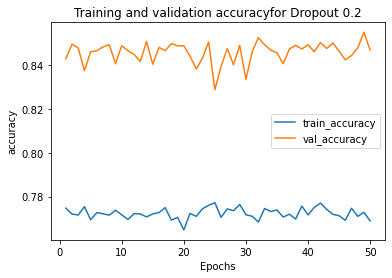

In [ ]:
model2.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
my_model2 = model1.fit(X_train,y_train,epochs = 50, batch_size=18, validation_split=0.2, verbose=2)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric + 'for Dropout 0.2')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(my_model2, 'accuracy')

Epoch 1/50
899/899 - 3s - loss: 1.1631 - accuracy: 0.7720 - val_loss: 0.5066 - val_accuracy: 0.8508 - 3s/epoch - 4ms/step
Epoch 2/50
899/899 - 3s - loss: 1.1923 - accuracy: 0.7680 - val_loss: 0.4720 - val_accuracy: 0.8503 - 3s/epoch - 4ms/step
Epoch 3/50
899/899 - 3s - loss: 1.1436 - accuracy: 0.7736 - val_loss: 0.4306 - val_accuracy: 0.8501 - 3s/epoch - 4ms/step
Epoch 4/50
899/899 - 3s - loss: 1.1856 - accuracy: 0.7708 - val_loss: 0.4841 - val_accuracy: 0.8538 - 3s/epoch - 4ms/step
Epoch 5/50
899/899 - 3s - loss: 1.1685 - accuracy: 0.7727 - val_loss: 0.5404 - val_accuracy: 0.8466 - 3s/epoch - 4ms/step
Epoch 6/50
899/899 - 3s - loss: 1.1440 - accuracy: 0.7728 - val_loss: 0.4256 - val_accuracy: 0.8451 - 3s/epoch - 4ms/step
Epoch 7/50
899/899 - 3s - loss: 1.1928 - accuracy: 0.7722 - val_loss: 0.4240 - val_accuracy: 0.8476 - 3s/epoch - 4ms/step
Epoch 8/50
899/899 - 3s - loss: 1.1803 - accuracy: 0.7699 - val_loss: 0.4087 - val_accuracy: 0.8424 - 3s/epoch - 4ms/step
Epoch 9/50
899/899 - 3s 

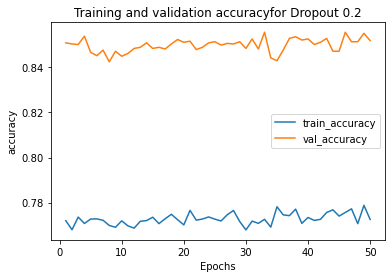

In [ ]:
model3.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
my_model3 = model1.fit(X_train,y_train,epochs = 50, batch_size=18, validation_split=0.2, verbose=2)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric + 'for Dropout 0.2')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(my_model3, 'accuracy')

# **OPTIMIZERS**

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(128,activation = 'relu'), 
     tf.keras.layers.Dense(32,activation = 'sigmoid'),
     tf.keras.layers.Dense(8,activation = 'softmax'),
     
    ])


Epoch 1/50
948/948 - 4s - loss: 0.5261 - accuracy: 0.7747 - val_loss: 0.4548 - val_accuracy: 0.7965 - 4s/epoch - 4ms/step
Epoch 2/50
948/948 - 3s - loss: 0.4452 - accuracy: 0.7973 - val_loss: 0.4437 - val_accuracy: 0.7947 - 3s/epoch - 3ms/step
Epoch 3/50
948/948 - 3s - loss: 0.4352 - accuracy: 0.8010 - val_loss: 0.4268 - val_accuracy: 0.8017 - 3s/epoch - 3ms/step
Epoch 4/50
948/948 - 3s - loss: 0.4315 - accuracy: 0.8000 - val_loss: 0.4233 - val_accuracy: 0.8042 - 3s/epoch - 3ms/step
Epoch 5/50
948/948 - 3s - loss: 0.4264 - accuracy: 0.8015 - val_loss: 0.4215 - val_accuracy: 0.8098 - 3s/epoch - 3ms/step
Epoch 6/50
948/948 - 3s - loss: 0.4233 - accuracy: 0.8046 - val_loss: 0.4772 - val_accuracy: 0.7534 - 3s/epoch - 3ms/step
Epoch 7/50
948/948 - 3s - loss: 0.4211 - accuracy: 0.8055 - val_loss: 0.4212 - val_accuracy: 0.8056 - 3s/epoch - 3ms/step
Epoch 8/50
948/948 - 3s - loss: 0.4180 - accuracy: 0.8071 - val_loss: 0.4517 - val_accuracy: 0.7969 - 3s/epoch - 3ms/step
Epoch 9/50
948/948 - 3s 

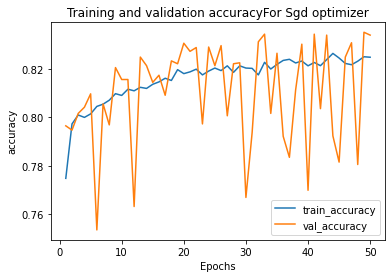

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])
my_model = model.fit(X_train,y_train,epochs = 50, validation_data=(X_train,y_train),batch_size=16,validation_split=0.25, verbose=2)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric + 'For Sgd optimizer')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(my_model, 'accuracy')

Epoch 1/50
948/948 - 4s - loss: 0.4701 - accuracy: 0.7963 - val_loss: 0.4020 - val_accuracy: 0.8248 - 4s/epoch - 4ms/step
Epoch 2/50
948/948 - 3s - loss: 0.3972 - accuracy: 0.8168 - val_loss: 0.3775 - val_accuracy: 0.8312 - 3s/epoch - 3ms/step
Epoch 3/50
948/948 - 3s - loss: 0.3798 - accuracy: 0.8231 - val_loss: 0.3697 - val_accuracy: 0.8347 - 3s/epoch - 3ms/step
Epoch 4/50
948/948 - 3s - loss: 0.3681 - accuracy: 0.8269 - val_loss: 0.3565 - val_accuracy: 0.8373 - 3s/epoch - 3ms/step
Epoch 5/50
948/948 - 3s - loss: 0.3607 - accuracy: 0.8299 - val_loss: 0.3521 - val_accuracy: 0.8361 - 3s/epoch - 3ms/step
Epoch 6/50
948/948 - 3s - loss: 0.3549 - accuracy: 0.8338 - val_loss: 0.3812 - val_accuracy: 0.8258 - 3s/epoch - 3ms/step
Epoch 7/50
948/948 - 3s - loss: 0.3525 - accuracy: 0.8343 - val_loss: 0.3435 - val_accuracy: 0.8462 - 3s/epoch - 3ms/step
Epoch 8/50
948/948 - 3s - loss: 0.3505 - accuracy: 0.8345 - val_loss: 0.3414 - val_accuracy: 0.8448 - 3s/epoch - 3ms/step
Epoch 9/50
948/948 - 3s 

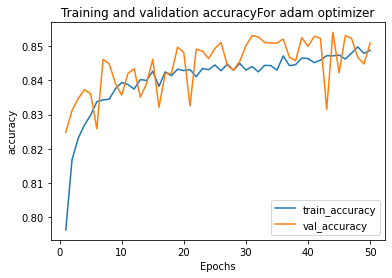

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
my_model = model.fit(X_train,y_train,epochs = 50, validation_data=(X_train,y_train),batch_size=16,validation_split=0.25, verbose=2)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric+ 'For adam optimizer')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(my_model, 'accuracy')

Epoch 1/50
948/948 - 5s - loss: 0.3733 - accuracy: 0.8260 - val_loss: 0.3577 - val_accuracy: 0.8349 - 5s/epoch - 5ms/step
Epoch 2/50
948/948 - 3s - loss: 0.3668 - accuracy: 0.8288 - val_loss: 0.4082 - val_accuracy: 0.8108 - 3s/epoch - 3ms/step
Epoch 3/50
948/948 - 3s - loss: 0.3598 - accuracy: 0.8291 - val_loss: 0.3451 - val_accuracy: 0.8444 - 3s/epoch - 3ms/step
Epoch 4/50
948/948 - 3s - loss: 0.3568 - accuracy: 0.8352 - val_loss: 0.3651 - val_accuracy: 0.8327 - 3s/epoch - 3ms/step
Epoch 5/50
948/948 - 3s - loss: 0.3546 - accuracy: 0.8323 - val_loss: 0.3427 - val_accuracy: 0.8448 - 3s/epoch - 3ms/step
Epoch 6/50
948/948 - 3s - loss: 0.3532 - accuracy: 0.8354 - val_loss: 0.3420 - val_accuracy: 0.8474 - 3s/epoch - 3ms/step
Epoch 7/50
948/948 - 3s - loss: 0.3522 - accuracy: 0.8345 - val_loss: 0.3467 - val_accuracy: 0.8430 - 3s/epoch - 3ms/step
Epoch 8/50
948/948 - 3s - loss: 0.3502 - accuracy: 0.8379 - val_loss: 0.3389 - val_accuracy: 0.8464 - 3s/epoch - 3ms/step
Epoch 9/50
948/948 - 3s 

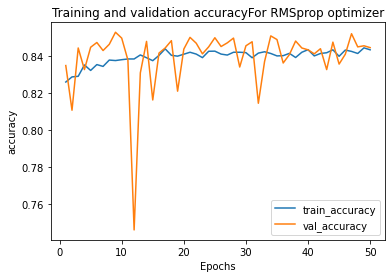

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'RMSprop',metrics = ['accuracy'])
my_model = model.fit(X_train,y_train,epochs = 50, validation_data=(X_train,y_train),batch_size=16,validation_split=0.25, verbose=2)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric+ 'For RMSprop optimizer')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(my_model, 'accuracy')

# **ACTIVATION FUNCTION** 

In [ ]:
model11 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(138,activation = 'relu'), 
     tf.keras.layers.Dense(32,activation = 'relu'),
     tf.keras.layers.Dense(8,activation = 'relu'),
     
    ])


Epoch 1/50
948/948 - 5s - loss: 0.3438 - accuracy: 0.8405 - val_loss: 0.3788 - val_accuracy: 0.8306 - 5s/epoch - 5ms/step
Epoch 2/50
948/948 - 4s - loss: 0.3427 - accuracy: 0.8422 - val_loss: 0.3353 - val_accuracy: 0.8535 - 4s/epoch - 4ms/step
Epoch 3/50
948/948 - 4s - loss: 0.3465 - accuracy: 0.8448 - val_loss: 0.3551 - val_accuracy: 0.8365 - 4s/epoch - 4ms/step
Epoch 4/50
948/948 - 4s - loss: 0.3430 - accuracy: 0.8400 - val_loss: 0.3354 - val_accuracy: 0.8504 - 4s/epoch - 4ms/step
Epoch 5/50
948/948 - 3s - loss: 0.3452 - accuracy: 0.8397 - val_loss: 0.3401 - val_accuracy: 0.8476 - 3s/epoch - 3ms/step
Epoch 6/50
948/948 - 5s - loss: 0.3419 - accuracy: 0.8446 - val_loss: 0.3630 - val_accuracy: 0.8325 - 5s/epoch - 5ms/step
Epoch 7/50
948/948 - 4s - loss: 0.3456 - accuracy: 0.8429 - val_loss: 0.3369 - val_accuracy: 0.8523 - 4s/epoch - 4ms/step
Epoch 8/50
948/948 - 4s - loss: 0.3435 - accuracy: 0.8433 - val_loss: 0.3670 - val_accuracy: 0.8294 - 4s/epoch - 4ms/step
Epoch 9/50
948/948 - 5s 

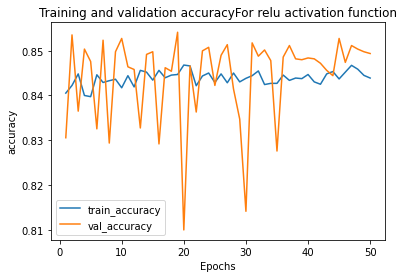

In [ ]:
model11.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
my_model = model.fit(X_train,y_train,epochs = 50, validation_data=(X_train,y_train),batch_size=16,validation_split=0.25, verbose=2)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric+ 'For relu activation function')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(my_model, 'accuracy')

In [ ]:
model12 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(140,activation = 'sigmoid'), 
     tf.keras.layers.Dense(50,activation = 'sigmoid'),
     tf.keras.layers.Dense(8,activation = 'sigmoid'),
     
    ])

Epoch 1/50
948/948 - 2s - loss: 0.4925 - accuracy: 0.7850 - val_loss: 0.4103 - val_accuracy: 0.8139 - 2s/epoch - 2ms/step
Epoch 2/50
948/948 - 1s - loss: 0.4043 - accuracy: 0.8143 - val_loss: 0.3879 - val_accuracy: 0.8298 - 1s/epoch - 2ms/step
Epoch 3/50
948/948 - 1s - loss: 0.3847 - accuracy: 0.8223 - val_loss: 0.3683 - val_accuracy: 0.8314 - 1s/epoch - 1ms/step
Epoch 4/50
948/948 - 1s - loss: 0.3723 - accuracy: 0.8257 - val_loss: 0.3537 - val_accuracy: 0.8422 - 1s/epoch - 1ms/step
Epoch 5/50
948/948 - 2s - loss: 0.3627 - accuracy: 0.8307 - val_loss: 0.3481 - val_accuracy: 0.8414 - 2s/epoch - 2ms/step
Epoch 6/50
948/948 - 1s - loss: 0.3607 - accuracy: 0.8307 - val_loss: 0.3456 - val_accuracy: 0.8409 - 1s/epoch - 1ms/step
Epoch 7/50
948/948 - 1s - loss: 0.3530 - accuracy: 0.8352 - val_loss: 0.3398 - val_accuracy: 0.8442 - 1s/epoch - 1ms/step
Epoch 8/50
948/948 - 1s - loss: 0.3533 - accuracy: 0.8331 - val_loss: 0.3383 - val_accuracy: 0.8490 - 1s/epoch - 1ms/step
Epoch 9/50
948/948 - 1s 

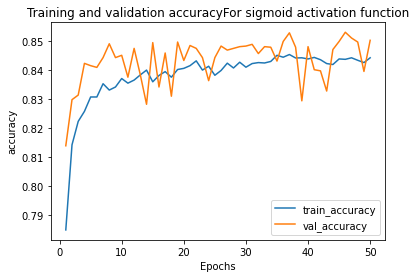

In [ ]:
model12.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
my_model = model12.fit(X_train,y_train,epochs = 50, validation_data=(X_train,y_train),batch_size=16,validation_split=0.25, verbose=2)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric+ 'For sigmoid activation function')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(my_model, 'accuracy')

In [ ]:
model13 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(150,activation = 'elu'), 
     tf.keras.layers.Dense(50,activation = 'elu'),
     tf.keras.layers.Dense(8,activation = 'elu'),
     
    ])


Epoch 1/50
948/948 - 2s - loss: 0.6932 - accuracy: 0.7513 - val_loss: 0.6931 - val_accuracy: 0.7563 - 2s/epoch - 2ms/step
Epoch 2/50
948/948 - 1s - loss: 0.6932 - accuracy: 0.7513 - val_loss: 0.6931 - val_accuracy: 0.7563 - 1s/epoch - 2ms/step
Epoch 3/50
948/948 - 1s - loss: 0.6932 - accuracy: 0.7513 - val_loss: 0.6931 - val_accuracy: 0.7563 - 1s/epoch - 2ms/step
Epoch 4/50
948/948 - 1s - loss: 0.6932 - accuracy: 0.7513 - val_loss: 0.6931 - val_accuracy: 0.7563 - 1s/epoch - 2ms/step
Epoch 5/50
948/948 - 1s - loss: 0.6932 - accuracy: 0.7513 - val_loss: 0.6931 - val_accuracy: 0.7563 - 1s/epoch - 2ms/step
Epoch 6/50
948/948 - 1s - loss: 0.6932 - accuracy: 0.7513 - val_loss: 0.6931 - val_accuracy: 0.7563 - 1s/epoch - 2ms/step
Epoch 7/50
948/948 - 1s - loss: 0.6932 - accuracy: 0.7513 - val_loss: 0.6931 - val_accuracy: 0.7563 - 1s/epoch - 2ms/step
Epoch 8/50
948/948 - 2s - loss: 0.6932 - accuracy: 0.7513 - val_loss: 0.6931 - val_accuracy: 0.7563 - 2s/epoch - 2ms/step
Epoch 9/50
948/948 - 1s 

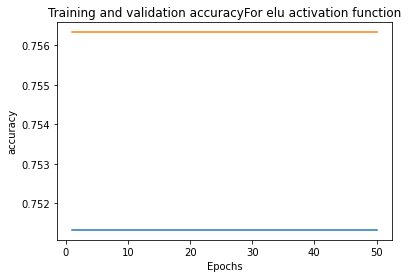

In [ ]:
model13.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
my_model = model13.fit(X_train,y_train,epochs = 50, validation_data=(X_train,y_train),batch_size=16,validation_split=0.25, verbose=2)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric+ 'For elu activation function')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
#     plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(my_model, 'accuracy')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import BatchNormalization

In [ ]:
# Base Model for optimization
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(128,activation = 'relu'), 
     tf.keras.layers.Dense(32,activation = 'sigmoid'),
     tf.keras.layers.Dense(8,activation = 'softmax'),
     
    ])

model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
# model.fit(X_train,y_train,epochs = 5, validation_data=(X_train,y_train),batch_size=16,validation_split=0.25, verbose=2)

KFold(n_splits=7, random_state=42, shuffle=True)
[    0     1     2 ... 20204 20205 20207] [    3     6    17 ... 20197 20203 20206]
Epoch 1/50
635/635 - 2s - loss: 0.4662 - accuracy: 0.7960 - val_loss: 0.4181 - val_accuracy: 0.8024 - 2s/epoch - 3ms/step
Epoch 2/50
635/635 - 1s - loss: 0.4080 - accuracy: 0.8131 - val_loss: 0.3921 - val_accuracy: 0.8236 - 882ms/epoch - 1ms/step
Epoch 3/50
635/635 - 1s - loss: 0.3876 - accuracy: 0.8214 - val_loss: 0.4102 - val_accuracy: 0.7988 - 909ms/epoch - 1ms/step
Epoch 4/50
635/635 - 1s - loss: 0.3765 - accuracy: 0.8281 - val_loss: 0.3682 - val_accuracy: 0.8322 - 864ms/epoch - 1ms/step
Epoch 5/50
635/635 - 1s - loss: 0.3698 - accuracy: 0.8303 - val_loss: 0.3571 - val_accuracy: 0.8355 - 871ms/epoch - 1ms/step
Epoch 6/50
635/635 - 1s - loss: 0.3651 - accuracy: 0.8314 - val_loss: 0.3544 - val_accuracy: 0.8295 - 969ms/epoch - 2ms/step
Epoch 7/50
635/635 - 1s - loss: 0.3590 - accuracy: 0.8356 - val_loss: 0.3516 - val_accuracy: 0.8369 - 943ms/epoch - 1ms/

Epoch 14/50
635/635 - 1s - loss: 0.3152 - accuracy: 0.8509 - val_loss: 0.3283 - val_accuracy: 0.8505 - 999ms/epoch - 2ms/step
Epoch 15/50
635/635 - 1s - loss: 0.3144 - accuracy: 0.8536 - val_loss: 0.3352 - val_accuracy: 0.8402 - 864ms/epoch - 1ms/step
Epoch 16/50
635/635 - 1s - loss: 0.3138 - accuracy: 0.8540 - val_loss: 0.3273 - val_accuracy: 0.8449 - 858ms/epoch - 1ms/step
Epoch 17/50
635/635 - 1s - loss: 0.3129 - accuracy: 0.8528 - val_loss: 0.3269 - val_accuracy: 0.8484 - 843ms/epoch - 1ms/step
Epoch 18/50
635/635 - 1s - loss: 0.3122 - accuracy: 0.8540 - val_loss: 0.3281 - val_accuracy: 0.8482 - 850ms/epoch - 1ms/step
Epoch 19/50
635/635 - 1s - loss: 0.3118 - accuracy: 0.8530 - val_loss: 0.3262 - val_accuracy: 0.8499 - 948ms/epoch - 1ms/step
Epoch 20/50
635/635 - 1s - loss: 0.3132 - accuracy: 0.8533 - val_loss: 0.3312 - val_accuracy: 0.8458 - 861ms/epoch - 1ms/step
Epoch 21/50
635/635 - 1s - loss: 0.3105 - accuracy: 0.8533 - val_loss: 0.3459 - val_accuracy: 0.8366 - 891ms/epoch - 1

Epoch 28/50
635/635 - 1s - loss: 0.2873 - accuracy: 0.8615 - val_loss: 0.3377 - val_accuracy: 0.8393 - 839ms/epoch - 1ms/step
Epoch 29/50
635/635 - 1s - loss: 0.2869 - accuracy: 0.8648 - val_loss: 0.3383 - val_accuracy: 0.8434 - 858ms/epoch - 1ms/step
Epoch 30/50
635/635 - 1s - loss: 0.2860 - accuracy: 0.8627 - val_loss: 0.3458 - val_accuracy: 0.8408 - 879ms/epoch - 1ms/step
Epoch 31/50
635/635 - 1s - loss: 0.2874 - accuracy: 0.8637 - val_loss: 0.3409 - val_accuracy: 0.8352 - 905ms/epoch - 1ms/step
Epoch 32/50
635/635 - 1s - loss: 0.2861 - accuracy: 0.8654 - val_loss: 0.3418 - val_accuracy: 0.8408 - 934ms/epoch - 1ms/step
Epoch 33/50
635/635 - 1s - loss: 0.2871 - accuracy: 0.8623 - val_loss: 0.3453 - val_accuracy: 0.8437 - 1s/epoch - 2ms/step
Epoch 34/50
635/635 - 1s - loss: 0.2830 - accuracy: 0.8640 - val_loss: 0.3379 - val_accuracy: 0.8375 - 1s/epoch - 2ms/step
Epoch 35/50
635/635 - 1s - loss: 0.2848 - accuracy: 0.8646 - val_loss: 0.3540 - val_accuracy: 0.8257 - 894ms/epoch - 1ms/ste

Epoch 42/50
635/635 - 1s - loss: 0.2629 - accuracy: 0.8772 - val_loss: 0.3646 - val_accuracy: 0.8387 - 853ms/epoch - 1ms/step
Epoch 43/50
635/635 - 1s - loss: 0.2623 - accuracy: 0.8739 - val_loss: 0.3826 - val_accuracy: 0.8343 - 855ms/epoch - 1ms/step
Epoch 44/50
635/635 - 1s - loss: 0.2624 - accuracy: 0.8759 - val_loss: 0.3710 - val_accuracy: 0.8363 - 846ms/epoch - 1ms/step
Epoch 45/50
635/635 - 1s - loss: 0.2627 - accuracy: 0.8734 - val_loss: 0.3740 - val_accuracy: 0.8337 - 861ms/epoch - 1ms/step
Epoch 46/50
635/635 - 1s - loss: 0.2618 - accuracy: 0.8736 - val_loss: 0.3783 - val_accuracy: 0.8331 - 860ms/epoch - 1ms/step
Epoch 47/50
635/635 - 1s - loss: 0.2608 - accuracy: 0.8765 - val_loss: 0.3745 - val_accuracy: 0.8254 - 847ms/epoch - 1ms/step
Epoch 48/50
635/635 - 1s - loss: 0.2621 - accuracy: 0.8748 - val_loss: 0.3916 - val_accuracy: 0.8405 - 853ms/epoch - 1ms/step
Epoch 49/50
635/635 - 1s - loss: 0.2610 - accuracy: 0.8755 - val_loss: 0.3771 - val_accuracy: 0.8251 - 847ms/epoch - 1

Epoch 5/50
635/635 - 1s - loss: 0.2434 - accuracy: 0.8821 - val_loss: 0.4135 - val_accuracy: 0.8355 - 866ms/epoch - 1ms/step
Epoch 6/50
635/635 - 1s - loss: 0.2390 - accuracy: 0.8864 - val_loss: 0.4131 - val_accuracy: 0.8349 - 1s/epoch - 2ms/step
Epoch 7/50
635/635 - 1s - loss: 0.2413 - accuracy: 0.8891 - val_loss: 0.4021 - val_accuracy: 0.8313 - 1s/epoch - 2ms/step
Epoch 8/50
635/635 - 1s - loss: 0.2400 - accuracy: 0.8878 - val_loss: 0.4157 - val_accuracy: 0.8316 - 1s/epoch - 2ms/step
Epoch 9/50
635/635 - 1s - loss: 0.2431 - accuracy: 0.8832 - val_loss: 0.4078 - val_accuracy: 0.8295 - 1s/epoch - 2ms/step
Epoch 10/50
635/635 - 1s - loss: 0.2427 - accuracy: 0.8837 - val_loss: 0.4109 - val_accuracy: 0.8419 - 965ms/epoch - 2ms/step
Epoch 11/50
635/635 - 1s - loss: 0.2388 - accuracy: 0.8864 - val_loss: 0.4023 - val_accuracy: 0.8396 - 934ms/epoch - 1ms/step
Epoch 12/50
635/635 - 1s - loss: 0.2411 - accuracy: 0.8855 - val_loss: 0.4053 - val_accuracy: 0.8349 - 1s/epoch - 2ms/step
Epoch 13/50


Epoch 19/50
635/635 - 1s - loss: 0.2253 - accuracy: 0.8949 - val_loss: 0.4347 - val_accuracy: 0.8384 - 892ms/epoch - 1ms/step
Epoch 20/50
635/635 - 1s - loss: 0.2244 - accuracy: 0.8938 - val_loss: 0.4587 - val_accuracy: 0.8340 - 932ms/epoch - 1ms/step
Epoch 21/50
635/635 - 1s - loss: 0.2253 - accuracy: 0.8929 - val_loss: 0.4655 - val_accuracy: 0.8366 - 891ms/epoch - 1ms/step
Epoch 22/50
635/635 - 1s - loss: 0.2262 - accuracy: 0.8923 - val_loss: 0.4559 - val_accuracy: 0.8260 - 911ms/epoch - 1ms/step
Epoch 23/50
635/635 - 1s - loss: 0.2230 - accuracy: 0.8933 - val_loss: 0.4479 - val_accuracy: 0.8346 - 909ms/epoch - 1ms/step
Epoch 24/50
635/635 - 1s - loss: 0.2229 - accuracy: 0.8923 - val_loss: 0.4440 - val_accuracy: 0.8357 - 928ms/epoch - 1ms/step
Epoch 25/50
635/635 - 1s - loss: 0.2251 - accuracy: 0.8909 - val_loss: 0.4478 - val_accuracy: 0.8384 - 888ms/epoch - 1ms/step
Epoch 26/50
635/635 - 1s - loss: 0.2243 - accuracy: 0.8924 - val_loss: 0.4305 - val_accuracy: 0.8390 - 911ms/epoch - 1

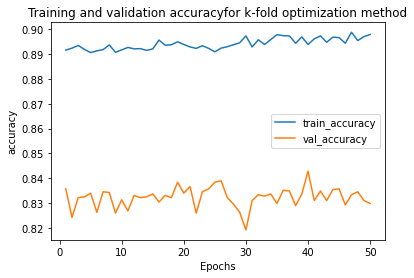

In [ ]:
# Kfold
def kfold(X_train, y_train):
    k_fold = KFold(n_splits=7,shuffle=True,random_state=42)
    print(k_fold)
    
    for train_idx, test_idx in list(k_fold.split(X_train)):
        print(train_idx, test_idx)
        X_kfold_train, X_kfold_test, y_kfold_train, y_kfold_test = train_test_split(X_train,y_train,test_size=0.33, random_state=42)
        X_kfold_train.shape, y_kfold_train.shape, X_kfold_test.shape, y_kfold_test.shape
        history = model.fit(X_kfold_train,y_kfold_train,epochs = 50, validation_data=(X_kfold_train,y_kfold_train),batch_size=16,validation_split=0.25, verbose=2)
        kfold_data = model.evaluate(X_test, y_test)
        print(kfold_data)
    plot_graph(history, 'accuracy')
        
kfold(X_train, y_train)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric + 'for k-fold optimization method')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

# **EARLY STOPPING**

Epoch 1/100
948/948 - 2s - loss: 0.4663 - accuracy: 0.7966 - val_loss: 0.4060 - val_accuracy: 0.8183 - 2s/epoch - 2ms/step
Epoch 2/100
948/948 - 1s - loss: 0.3956 - accuracy: 0.8182 - val_loss: 0.3822 - val_accuracy: 0.8272 - 1s/epoch - 2ms/step
Epoch 3/100
948/948 - 1s - loss: 0.3764 - accuracy: 0.8238 - val_loss: 0.3673 - val_accuracy: 0.8317 - 1s/epoch - 1ms/step
Epoch 4/100
948/948 - 1s - loss: 0.3658 - accuracy: 0.8292 - val_loss: 0.4084 - val_accuracy: 0.8017 - 1s/epoch - 1ms/step
Epoch 5/100
948/948 - 1s - loss: 0.3612 - accuracy: 0.8291 - val_loss: 0.3616 - val_accuracy: 0.8270 - 1s/epoch - 1ms/step
Epoch 6/100
948/948 - 1s - loss: 0.3554 - accuracy: 0.8333 - val_loss: 0.3458 - val_accuracy: 0.8405 - 1s/epoch - 1ms/step
Epoch 7/100
948/948 - 1s - loss: 0.3524 - accuracy: 0.8368 - val_loss: 0.3627 - val_accuracy: 0.8335 - 1s/epoch - 1ms/step
Epoch 8/100
948/948 - 1s - loss: 0.3485 - accuracy: 0.8374 - val_loss: 0.3531 - val_accuracy: 0.8347 - 1s/epoch - 1ms/step
Epoch 9/100
948/

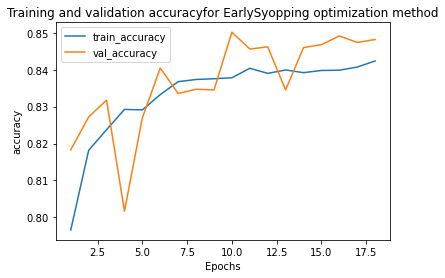

In [ ]:
# EarlySTopping
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=16, 
    verbose=2,
    callbacks=[early_stopping]
)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric+ 'for EarlySyopping optimization method')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(history, 'accuracy')

## **Batch Normalization** 

Epoch 1/50
948/948 - 7s - loss: 1.3276 - accuracy: 0.7018 - val_loss: 0.9982 - val_accuracy: 0.7278 - 7s/epoch - 7ms/step
Epoch 2/50
948/948 - 2s - loss: 0.7408 - accuracy: 0.7939 - val_loss: 0.6020 - val_accuracy: 0.8127 - 2s/epoch - 2ms/step
Epoch 3/50
948/948 - 2s - loss: 0.5321 - accuracy: 0.8164 - val_loss: 0.4521 - val_accuracy: 0.8357 - 2s/epoch - 2ms/step
Epoch 4/50
948/948 - 2s - loss: 0.4541 - accuracy: 0.8197 - val_loss: 0.4214 - val_accuracy: 0.8266 - 2s/epoch - 2ms/step
Epoch 5/50
948/948 - 2s - loss: 0.4164 - accuracy: 0.8213 - val_loss: 0.4035 - val_accuracy: 0.8282 - 2s/epoch - 2ms/step
Epoch 6/50
948/948 - 2s - loss: 0.3981 - accuracy: 0.8223 - val_loss: 0.3686 - val_accuracy: 0.8359 - 2s/epoch - 2ms/step
Epoch 7/50
948/948 - 2s - loss: 0.3872 - accuracy: 0.8244 - val_loss: 0.3632 - val_accuracy: 0.8337 - 2s/epoch - 2ms/step
Epoch 8/50
948/948 - 2s - loss: 0.3780 - accuracy: 0.8252 - val_loss: 0.3595 - val_accuracy: 0.8347 - 2s/epoch - 2ms/step
Epoch 9/50
948/948 - 2s 

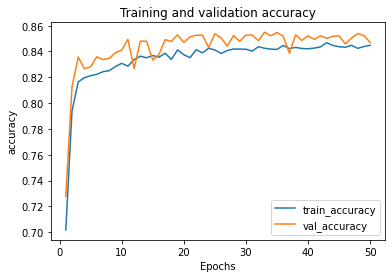

In [ ]:

model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(128, kernel_initializer='he_normal', use_bias=False),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Activation('relu'),
     tf.keras.layers.Dense(32, kernel_initializer='he_normal', use_bias=False),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Activation('sigmoid'),
     tf.keras.layers.Dense(8, kernel_initializer='he_normal', use_bias=False),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Activation('softmax'),
    ])

model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_train,y_train),
    validation_split=0.25, 
    batch_size=16, 
    verbose=2,
)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric+ 'for Batch Normalization optimization method')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(history, 'accuracy')

# **Gradient Clipping**

Epoch 1/50
948/948 - 6s - loss: 0.4849 - accuracy: 0.7961 - val_loss: 0.4185 - val_accuracy: 0.8017 - 6s/epoch - 6ms/step
Epoch 2/50
948/948 - 1s - loss: 0.4001 - accuracy: 0.8132 - val_loss: 0.3806 - val_accuracy: 0.8264 - 1s/epoch - 1ms/step
Epoch 3/50
948/948 - 1s - loss: 0.3808 - accuracy: 0.8213 - val_loss: 0.3634 - val_accuracy: 0.8331 - 1s/epoch - 2ms/step
Epoch 4/50
948/948 - 1s - loss: 0.3679 - accuracy: 0.8271 - val_loss: 0.3599 - val_accuracy: 0.8397 - 1s/epoch - 1ms/step
Epoch 5/50
948/948 - 1s - loss: 0.3599 - accuracy: 0.8323 - val_loss: 0.3633 - val_accuracy: 0.8333 - 1s/epoch - 1ms/step
Epoch 6/50
948/948 - 1s - loss: 0.3562 - accuracy: 0.8325 - val_loss: 0.3438 - val_accuracy: 0.8416 - 1s/epoch - 1ms/step
Epoch 7/50
948/948 - 1s - loss: 0.3531 - accuracy: 0.8335 - val_loss: 0.3485 - val_accuracy: 0.8413 - 1s/epoch - 1ms/step
Epoch 8/50
948/948 - 1s - loss: 0.3492 - accuracy: 0.8354 - val_loss: 0.3414 - val_accuracy: 0.8418 - 1s/epoch - 1ms/step
Epoch 9/50
948/948 - 1s 

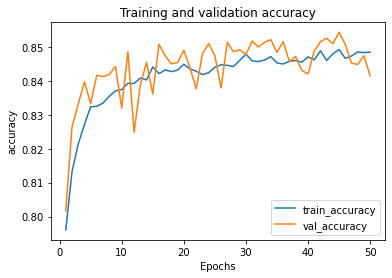

In [ ]:


# Base Model
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(128,activation = 'relu'), 
     tf.keras.layers.Dense(32,activation = 'sigmoid'),
     tf.keras.layers.Dense(8,activation = 'softmax'),
     
    ])
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(clipvalue=0.5),metrics = ['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_train,y_train),
    validation_split=0.25, 
    batch_size=16, 
    verbose=2,
)

def plot_graph(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric+ 'for Gradient clipping optimization method')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_graph(history, 'accuracy')

# **REFERENCES**

https://numpy.org/doc/stable/reference/

https://pandas.pydata.org/docs/reference/

https://matplotlib.org/stable/index.html

https://docs.python.org/3.9/library/index.html

https://keras.io/api/models/model/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split
